In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets

In [2]:
#df = pd.read_csv('cancer_reg.csv')
df = pd.read_csv('cancer_reg.csv', engine='python')
#df = pd.read_csv('cancer_reg.csv', encoding='utf-8')

# format podataka
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")
df.head()



shape: 
 (3047, 34)

 types:
 avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone   

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
#analiza statistickih velicina
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [4]:
#nedostajuci podaci
a=df.isnull().sum()
print(a)
udeo=df.isnull().sum()/len(df)*100
print("\n U procentima: \n",udeo)

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [5]:
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")

shape: 
 (3047, 34)

 types:
 avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone   

In [6]:
#izbacujemo obelezje jer nedostaje 75% podataka

df=df.drop(['PctSomeCol18_24'],axis=1)
df.describe()



,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [7]:
#izbacujemo 31 uzorak zbog outlier-a u med age
df.drop(df.loc[df['MedianAge']>100].index, inplace=True)
print(df.shape)

(3017, 33)


In [8]:
#nedostajuci podaci
a=df.isnull().sum()
print(a)
udeo=df.isnull().sum()/len(df)*100
print("\n U procentima: \n",udeo)

df.shape

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over         149
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    602
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRat

(3017, 33)

In [9]:
df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].median(), inplace=True)
df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].median(), inplace=True)
#d a t a_f i l l = data . f i l l n a ( data . median ( ) , i n p l a c e = Fal s e )
#pd.to numeric

In [10]:
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")

shape: 
 (3017, 33)

 types:
 avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                 

In [11]:
df['binnedInc'] = df['binnedInc'].str.strip('[]')
df['binnedInc'] = df['binnedInc'].str.strip('()')


In [12]:
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")

shape: 
 (3017, 33)

 types:
 avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                 

In [13]:
df[["MinInc","MaxInc"]]=df.binnedInc.str.split(expand=True,pat=",")



In [14]:
#nedostajuci podaci
a=df.isnull().sum()
print(a)
udeo=df.isnull().sum()/len(df)*100
print("\n U procentima: \n",udeo)

df.shape

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
MinInc                     0
MaxInc        

(3017, 35)

In [15]:
df['MaxInc'] = df['MaxInc'].astype(float)

In [16]:
df['MinInc'] = df['MaxInc'].astype(float)

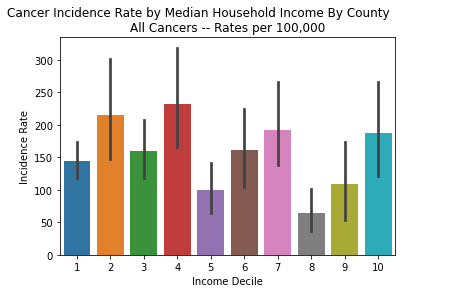

In [17]:
bar = sns.barplot(x="binnedInc", y="studyPerCap", data=df)
bar.set_xticklabels(labels=range(1,11))
bar.set_title(label=
              "Cancer Incidence Rate by Median Household Income By County\
               \nAll Cancers -- Rates per 100,000")
bar.set_xlabel(xlabel="Income Decile")
bar.set_ylabel(ylabel="Incidence Rate") 
plt.show()

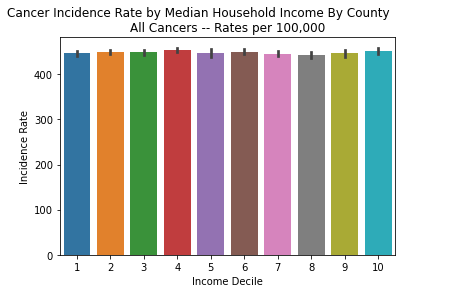

In [18]:
bar = sns.barplot(x="binnedInc", y="incidenceRate", data=df)
bar.set_xticklabels(labels=range(1,11))
bar.set_title(label=
              "Cancer Incidence Rate by Median Household Income By County\
               \nAll Cancers -- Rates per 100,000")
bar.set_xlabel(xlabel="Income Decile")
bar.set_ylabel(ylabel="Incidence Rate") 
plt.show()

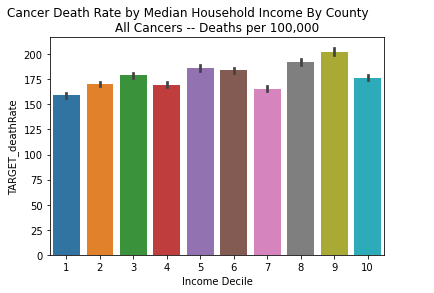

In [19]:
bar = sns.barplot(x="binnedInc", y="TARGET_deathRate", data=df)
bar.set_xticklabels(labels=range(1,11))
bar.set_title(label=
              "Cancer Death Rate by Median Household Income By County\
               \nAll Cancers -- Deaths per 100,000")
bar.set_xlabel(xlabel="Income Decile")
bar.set_ylabel(ylabel="TARGET_deathRate") 
plt.show()

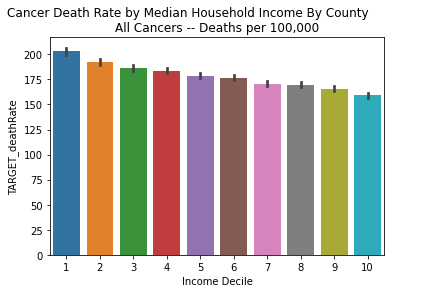

In [22]:
df['Decile_rank']=pd.qcut(df['medIncome'],10,labels=False)
df.head()
bar = sns.barplot(x="Decile_rank", y="TARGET_deathRate", data=df)
bar.set_xticklabels(labels=range(1,11))
bar.set_title(label=
              "Cancer Death Rate by Median Household Income By County\
               \nAll Cancers -- Deaths per 100,000")
bar.set_xlabel(xlabel="Income Decile")
bar.set_ylabel(ylabel="TARGET_deathRate") 
plt.show()

In [23]:
df=df.drop(['binnedInc'],axis=1)

In [24]:
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")

shape: 
 (3017, 35)

 types:
 avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack                 

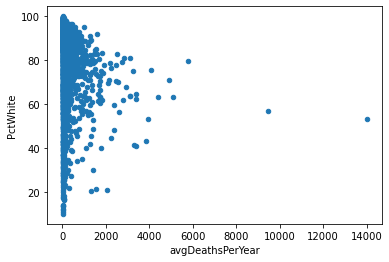

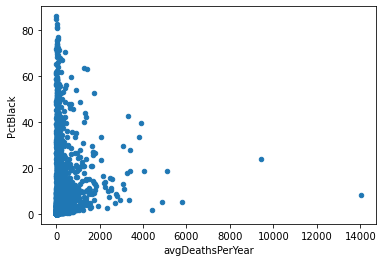

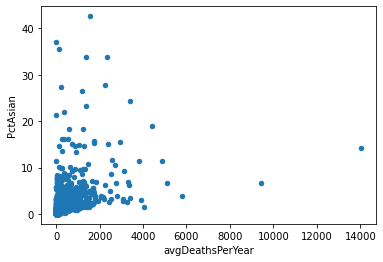

In [25]:
#plt.boxplot(df['PctWhite','avgDeathsPerYear'],df['PctBlack','avgDeathsPerYear'],df['PctAsian','avgDeathsPerYear'])
#plt.xticks([1,2,3],["White","Black","Asian"])
df.plot.scatter(x='avgDeathsPerYear',y='PctWhite')
df.plot.scatter(x='avgDeathsPerYear',y='PctBlack')
df.plot.scatter(x='avgDeathsPerYear',y='PctAsian')

In [26]:
matrica_korelacije = df.corr() 
print(matrica_korelacije)

                         avgAnnCount  avgDeathsPerYear  TARGET_deathRate  \
avgAnnCount                 1.000000          0.939652         -0.142847   
avgDeathsPerYear            0.939652          1.000000         -0.090426   
TARGET_deathRate           -0.142847         -0.090426          1.000000   
incidenceRate               0.074173          0.063082          0.448365   
medIncome                   0.269259          0.223455         -0.427823   
popEst2015                  0.927195          0.977858         -0.119418   
povertyPercent             -0.135409         -0.066748          0.429310   
studyPerCap                 0.081915          0.063304         -0.022482   
MedianAge                  -0.122427         -0.144721         -0.004288   
MedianAgeMale              -0.124571         -0.147848         -0.021415   
MedianAgeFemale            -0.122300         -0.143509          0.012731   
AvgHouseholdSize            0.064805          0.085860         -0.038131   
PercentMarri

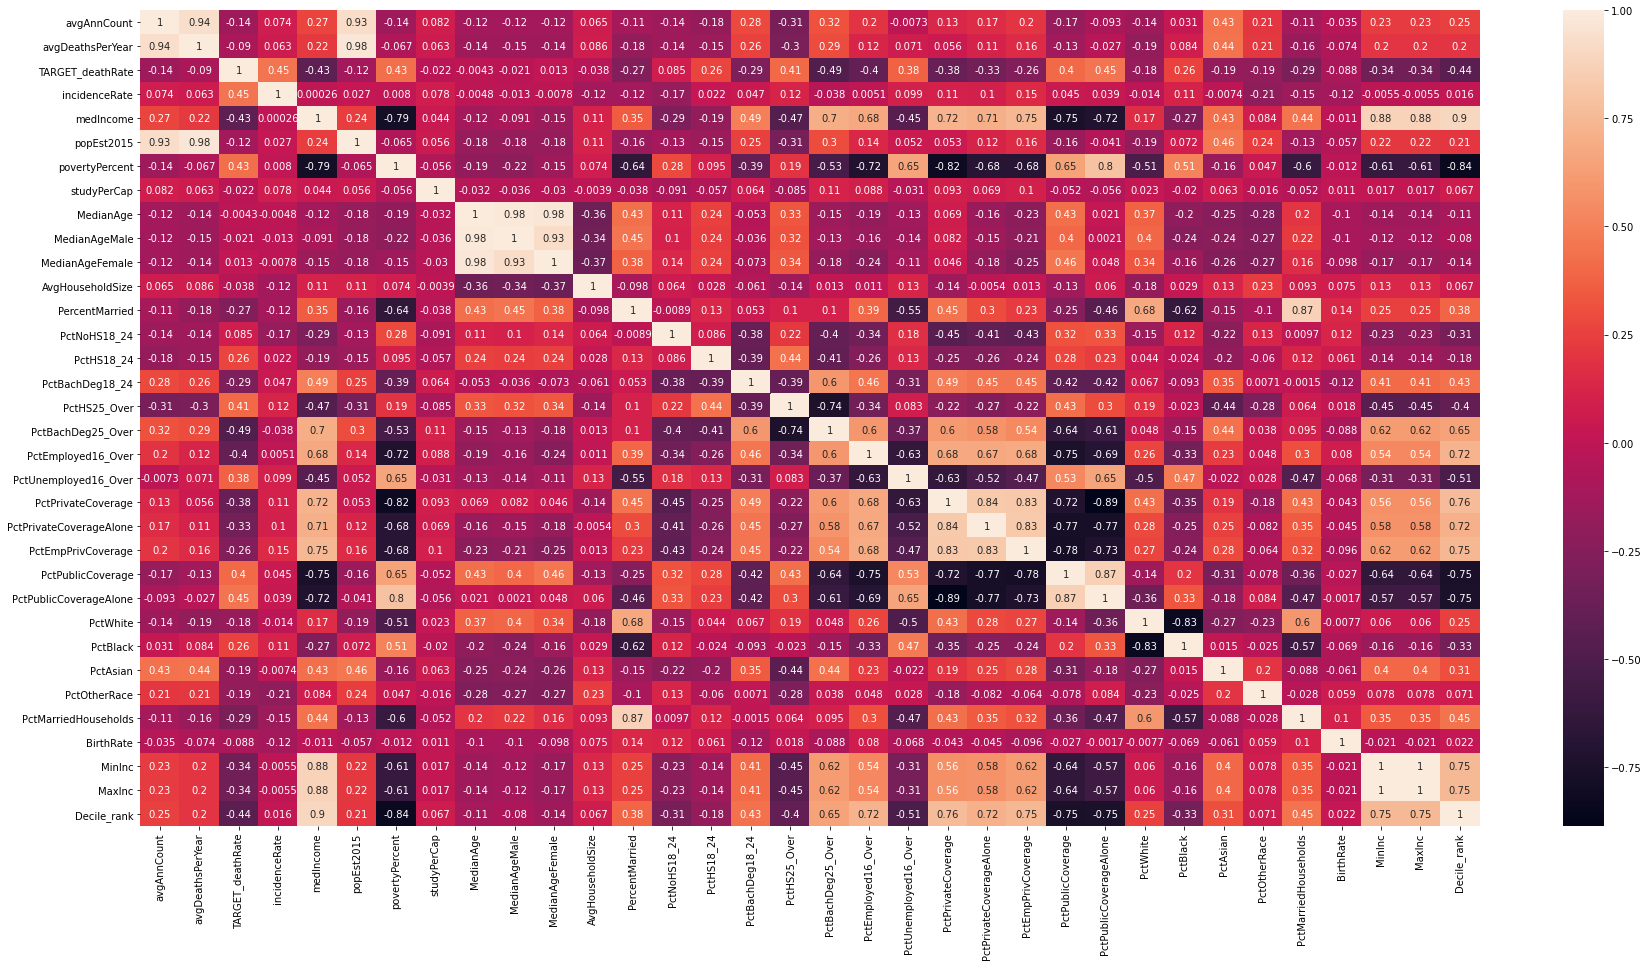

In [27]:
import seaborn as sb
plt.figure(figsize=(30,15))

sb.heatmap(matrica_korelacije, annot=True)

In [28]:
matrica_korelacije = df.corr() 
print(matrica_korelacije['TARGET_deathRate'])

avgAnnCount               -0.142847
avgDeathsPerYear          -0.090426
TARGET_deathRate           1.000000
incidenceRate              0.448365
medIncome                 -0.427823
popEst2015                -0.119418
povertyPercent             0.429310
studyPerCap               -0.022482
MedianAge                 -0.004288
MedianAgeMale             -0.021415
MedianAgeFemale            0.012731
AvgHouseholdSize          -0.038131
PercentMarried            -0.266849
PctNoHS18_24               0.085444
PctHS18_24                 0.264620
PctBachDeg18_24           -0.288533
PctHS25_Over               0.405163
PctBachDeg25_Over         -0.485203
PctEmployed16_Over        -0.397935
PctUnemployed16_Over       0.379638
PctPrivateCoverage        -0.384792
PctPrivateCoverageAlone   -0.326640
PctEmpPrivCoverage        -0.264728
PctPublicCoverage          0.404779
PctPublicCoverageAlone     0.448887
PctWhite                  -0.178447
PctBlack                   0.259574
PctAsian                  -0

In [29]:
matrica_korelacije = df.corr() 
print(matrica_korelacije['povertyPercent'])

avgAnnCount               -0.135409
avgDeathsPerYear          -0.066748
TARGET_deathRate           0.429310
incidenceRate              0.008038
medIncome                 -0.788274
popEst2015                -0.064906
povertyPercent             1.000000
studyPerCap               -0.056217
MedianAge                 -0.193780
MedianAgeMale             -0.215266
MedianAgeFemale           -0.148848
AvgHouseholdSize           0.073550
PercentMarried            -0.642055
PctNoHS18_24               0.284937
PctHS18_24                 0.094754
PctBachDeg18_24           -0.387924
PctHS25_Over               0.193788
PctBachDeg25_Over         -0.530799
PctEmployed16_Over        -0.720636
PctUnemployed16_Over       0.654418
PctPrivateCoverage        -0.822348
PctPrivateCoverageAlone   -0.682704
PctEmpPrivCoverage        -0.682007
PctPublicCoverage          0.651187
PctPublicCoverageAlone     0.798509
PctWhite                  -0.509037
PctBlack                   0.511933
PctAsian                  -0

In [30]:
df.Geography.str.split(expand=True,pat=",")

,0,1
0,Kitsap County,Washington
1,Kittitas County,Washington
2,Klickitat County,Washington
3,Lewis County,Washington
4,Lincoln County,Washington
...,...,...
3042,Ellsworth County,Kansas
3043,Finney County,Kansas
3044,Ford County,Kansas
3045,Franklin County,Kansas


In [31]:
df[['County','State']]=df.Geography.str.split(expand=True,pat=",")
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,MinInc,MaxInc,Decile_rank,County,State
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,2.594728,4.821857,1.843479,52.856076,6.118831,125635.0,125635.0,9,Kitsap County,Washington
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.969102,2.246233,3.741352,45.372500,4.333096,51046.4,51046.4,6,Kittitas County,Washington
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.739673,0.465898,2.747358,54.444868,3.729488,51046.4,51046.4,6,Klickitat County,Washington
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.782626,1.161359,1.362643,51.021514,4.603841,45201.0,45201.0,4,Lewis County,Washington
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.270192,0.665830,0.492135,54.027460,6.796657,51046.4,51046.4,6,Lincoln County,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,3.837754,0.327613,1.700468,51.063830,7.773512,48021.6,48021.6,5,Ellsworth County,Kansas
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,2.326771,4.044920,14.130288,52.007937,8.186470,51046.4,51046.4,6,Finney County,Kansas
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,2.313188,1.316472,5.680705,55.153949,7.809192,54545.6,54545.6,7,Ford County,Kansas
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,1.176562,0.244632,2.131790,58.484232,7.582938,51046.4,51046.4,6,Franklin County,Kansas


In [32]:
print(df['State'].unique())

[' Washington' ' West Virginia' ' Wisconsin' ' Nebraska' ' Nevada'
 ' New Hampshire' ' New Jersey' ' New Mexico' ' New York' ' Virginia'
 ' Michigan' ' Minnesota' ' North Carolina' ' North Dakota' ' Alabama'
 ' Arkansas' ' California' ' Montana' ' Tennessee' ' Texas' ' Louisiana'
 ' Maine' ' Maryland' ' Massachusetts' ' Utah' ' Vermont' ' Colorado'
 ' Wyoming' ' Mississippi' ' Missouri' ' Kansas' ' Kentucky'
 ' Connecticut' ' Delaware' ' District of Columbia' ' Florida' ' Oklahoma'
 ' Oregon' ' Ohio' ' Pennsylvania' ' Rhode Island' ' South Carolina'
 ' Indiana' ' Iowa' ' Georgia' ' Hawaii' ' Idaho' ' Illinois' ' Alaska'
 ' Arizona' ' South Dakota']


In [33]:
df=df.drop(['Geography'],axis=1)


In [34]:
df=df.drop(['County'],axis=1)

In [35]:
pd.set_option('display.max_columns', df.shape[0]+1)
print(df)

      avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
0         61898      260131            11.2   499.748204       3

In [36]:
df.loc[df['State']==' Washington','State']=1
df.loc[df['State']==' West Virginia','State']=2
df.loc[df['State']==' Wisconsin','State']=3
df.loc[df['State']==' Nebraska','State']=4
df.loc[df['State']==' Nevada','State']=5
df.loc[df['State']==' New Hampshire','State']=6
df.loc[df['State']==' New Jersey','State']=7
df.loc[df['State']==' New Mexico','State']=8
df.loc[df['State']==' New York','State']=9
df.loc[df['State']==' Virginia','State']=10
df.loc[df['State']==' Michigan','State']=11
df.loc[df['State']==' Minnesota','State']=12
df.loc[df['State']==' North Carolina','State']=13
df.loc[df['State']==' North Dakota','State']=14
df.loc[df['State']==' Alabama','State']=15
df.loc[df['State']==' Arkansas','State']=16
df.loc[df['State']==' California','State']=17
df.loc[df['State']==' Montana','State']=18
df.loc[df['State']==' Tennessee','State']=19
df.loc[df['State']==' Texas','State']=20
df.loc[df['State']==' Louisiana','State']=21
df.loc[df['State']==' Maine','State']=22
df.loc[df['State']==' Maryland','State']=23
df.loc[df['State']==' Massachusetts','State']=24
df.loc[df['State']==' Utah','State']=25
df.loc[df['State']==' Vermont','State']=26
df.loc[df['State']==' Colorado','State']=27
df.loc[df['State']==' Wyoming','State']=28
df.loc[df['State']==' Mississippi','State']=29
df.loc[df['State']==' Missouri','State']=30
df.loc[df['State']==' Kansas','State']=31
df.loc[df['State']==' Kentucky','State']=32
df.loc[df['State']==' Connecticut','State']=33
df.loc[df['State']==' Delaware','State']=34
df.loc[df['State']==' District of Columbia','State']=35
df.loc[df['State']==' Florida','State']=36
df.loc[df['State']==' Oklahoma','State']=37
df.loc[df['State']==' Oregon','State']=38
df.loc[df['State']==' Ohio','State']=39
df.loc[df['State']==' Pennsylvania','State']=40
df.loc[df['State']==' Rhode Island','State']=41
df.loc[df['State']==' South Carolina','State']=42
df.loc[df['State']==' Indiana','State']=43
df.loc[df['State']==' Iowa','State']=44
df.loc[df['State']==' Georgia','State']=45
df.loc[df['State']==' Hawaii','State']=46
df.loc[df['State']==' Idaho','State']=47
df.loc[df['State']==' Illinois','State']=48
df.loc[df['State']==' Alaska','State']=49
df.loc[df['State']==' Arizona','State']=50
df.loc[df['State']==' South Dakota','State']=51
print(sorted(df['State'].unique()))
df['State']=df['State'].astype(str).astype(int)





[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [37]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,MinInc,MaxInc,Decile_rank,State
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3.017000e+03,3017.00000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,607.573376,186.285714,178.648194,448.154402,47060.539277,1.027189e+05,16.88240,156.586892,40.823865,39.568445,42.144216,2.479039,51.777826,18.229367,34.985979,6.164236,34.808784,13.282168,54.167683,7.839476,64.360093,48.501226,41.204972,36.257474,19.243818,83.673433,9.093275,1.255703,1.982160,51.249931,5.639141,53953.778290,53953.778290,4.499834,25.691084
std,1422.111040,506.346011,27.737080,54.608081,12053.191812,3.302862e+05,6.41602,532.071270,5.196933,5.225173,5.297612,0.430364,6.906403,8.099370,9.072727,4.537942,7.039854,5.404494,8.115929,3.439396,10.629592,9.007923,9.426938,7.843518,6.116668,16.356226,14.550428,2.615716,3.524972,6.580059,1.983919,24923.765051,24923.765051,2.873450,14.272454
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.20000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,34218.100000,34218.100000,0.000000,1.000000
25%,76.000000,28.000000,161.300000,420.300000,38887.000000,1.170300e+04,12.20000,0.000000,37.700000,36.400000,39.100000,2.370000,47.800000,12.800000,29.200000,3.100000,30.400000,9.400000,48.900000,5.500000,57.200000,43.100000,34.500000,30.900000,14.800000,77.399902,0.620104,0.254509,0.294923,47.779088,4.524920,40362.700000,40362.700000,2.000000,13.000000
50%,170.000000,61.000000,178.100000,453.549422,45207.000000,2.658900e+04,15.80000,0.000000,40.900000,39.500000,42.300000,2.500000,52.400000,17.200000,34.700000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.400000,18.800000,90.059774,2.238336,0.550631,0.826185,51.678241,5.380501,48021.600000,48021.600000,4.000000,24.000000
75%,515.000000,147.000000,195.200000,480.800000,52476.000000,6.850200e+04,20.40000,83.896902,43.800000,42.600000,45.300000,2.630000,56.400000,22.700000,40.700000,8.200000,39.700000,16.100000,60.000000,9.700000,72.100000,53.800000,47.600000,41.600000,23.100000,95.443269,10.420061,1.220816,2.176268,55.396115,6.491885,54545.600000,54545.600000,7.000000,39.000000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.40000,9762.308998,65.300000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,125635.000000,125635.000000,9.000000,51.000000


In [40]:
df.loc[df['avgDeathsPerYear'].idxmax()]

avgAnnCount                3.815000e+04
avgDeathsPerYear           1.401000e+04
TARGET_deathRate           1.484000e+02
incidenceRate              4.055000e+02
medIncome                  5.568600e+04
popEst2015                 1.017029e+07
povertyPercent             1.870000e+01
studyPerCap                2.559415e+02
MedianAge                  3.560000e+01
MedianAgeMale              3.440000e+01
MedianAgeFemale            3.680000e+01
AvgHouseholdSize           3.020000e+00
PercentMarried             4.240000e+01
PctNoHS18_24               1.530000e+01
PctHS18_24                 2.700000e+01
PctBachDeg18_24            9.900000e+00
PctHS25_Over               2.070000e+01
PctBachDeg25_Over          1.980000e+01
PctEmployed16_Over         5.800000e+01
PctUnemployed16_Over       1.000000e+01
PctPrivateCoverage         5.500000e+01
PctPrivateCoverageAlone    4.740000e+01
PctEmpPrivCoverage         3.970000e+01
PctPublicCoverage          3.290000e+01
PctPublicCoverageAlone     2.300000e+01


Text(0, 0.5, 'Broj godina')

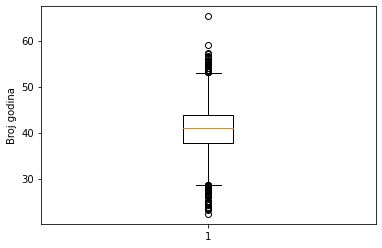

In [41]:
plt.figure(),plt.boxplot(df['MedianAge'])
plt.ylabel('Broj godina')

Text(0, 0.5, 'Broj umrlih')

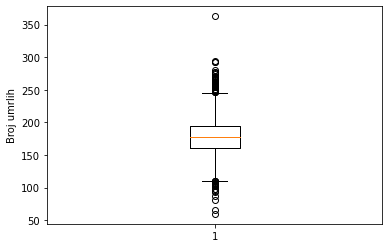

In [42]:
plt.figure(),plt.boxplot(df['TARGET_deathRate'])
plt.ylabel('Broj umrlih')

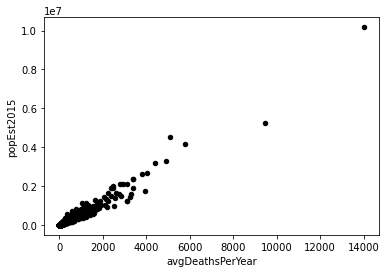

In [43]:
df.plot.scatter(x='avgDeathsPerYear',y='popEst2015', c="black")

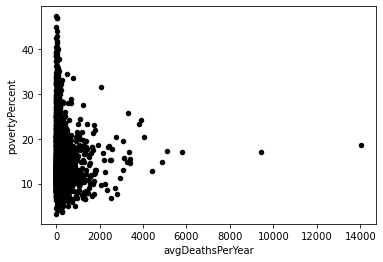

In [44]:
df.plot.scatter(x='avgDeathsPerYear',y='povertyPercent', c="black")

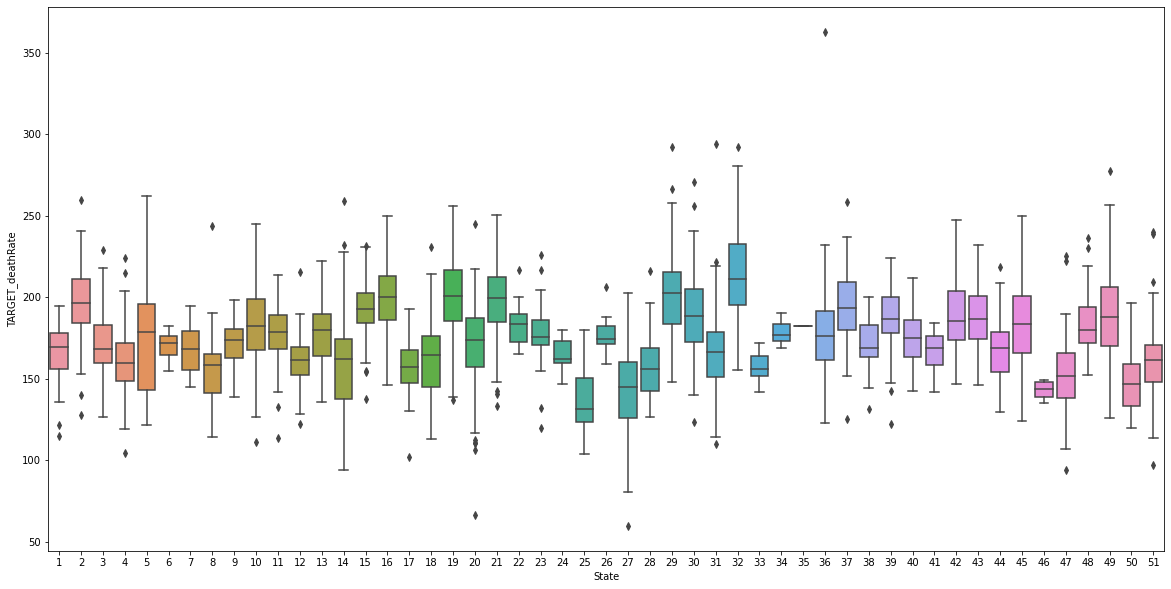

In [45]:
import seaborn as sns
plt.figure(figsize=(20,10))
fig=sns.boxplot(x='State', y="TARGET_deathRate", data=df)

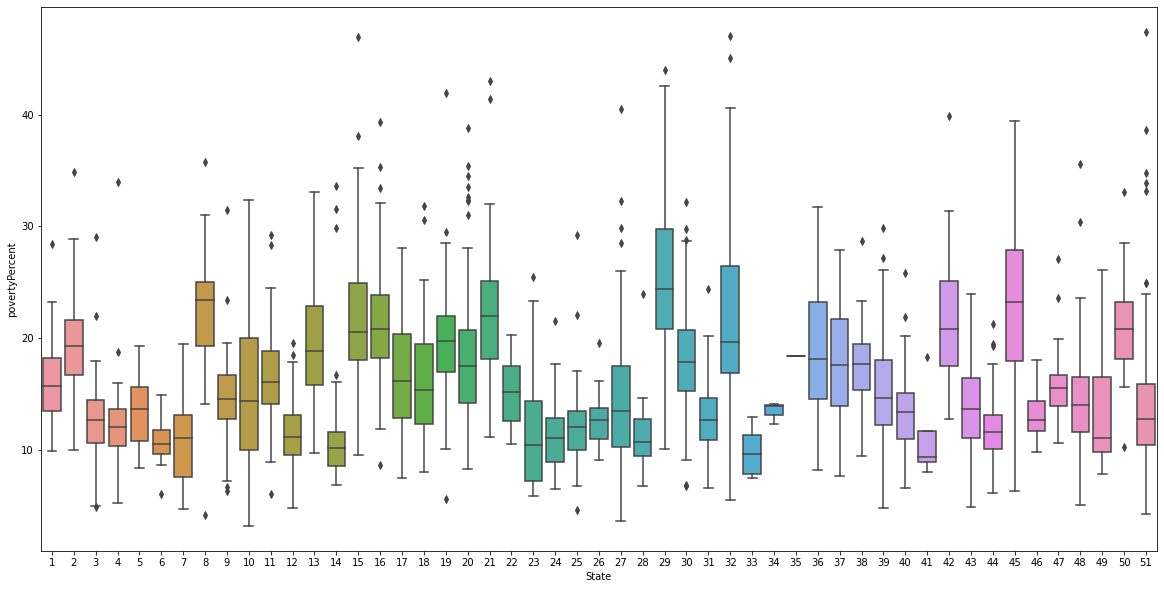

In [46]:
plt.figure(figsize=(20,10))
fig=sns.boxplot(x='State', y="povertyPercent", data=df)

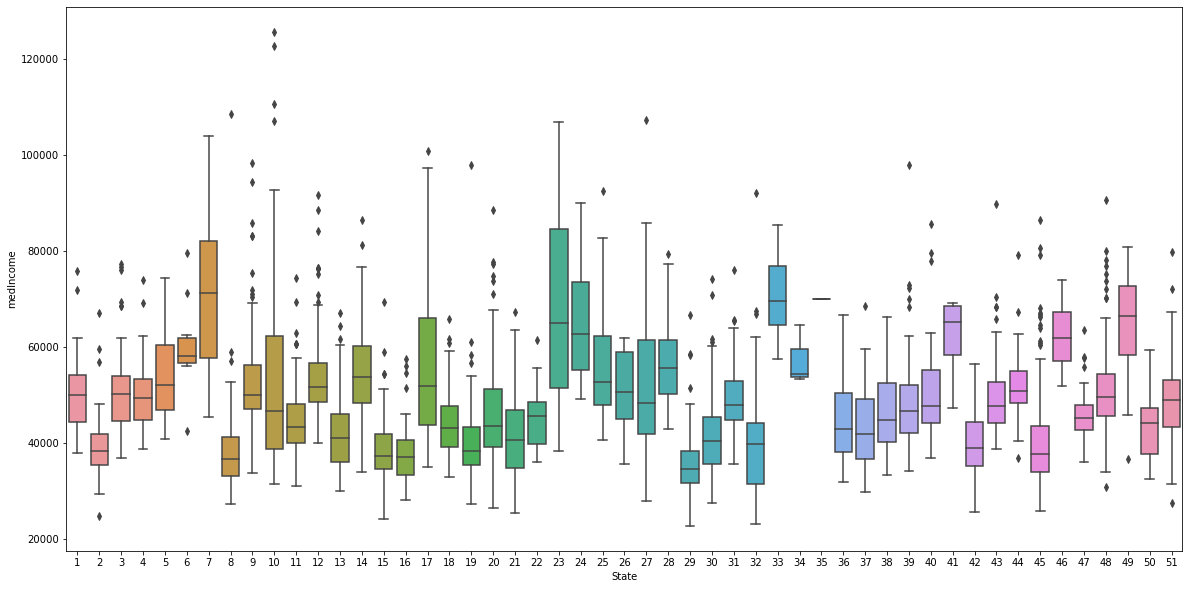

In [47]:
plt.figure(figsize=(20,10))
fig=sns.boxplot(x='State', y="medIncome", data=df)

In [48]:
df['Decile_rank']=pd.qcut(df['medIncome'],10,labels=False)
df.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,MinInc,MaxInc,Decile_rank,State
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,48.7,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,125635.0,125635.0,9,1
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,51046.4,51046.4,6,1
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,51046.4,51046.4,6,1
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,45201.0,45201.0,4,1
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,51046.4,51046.4,6,1


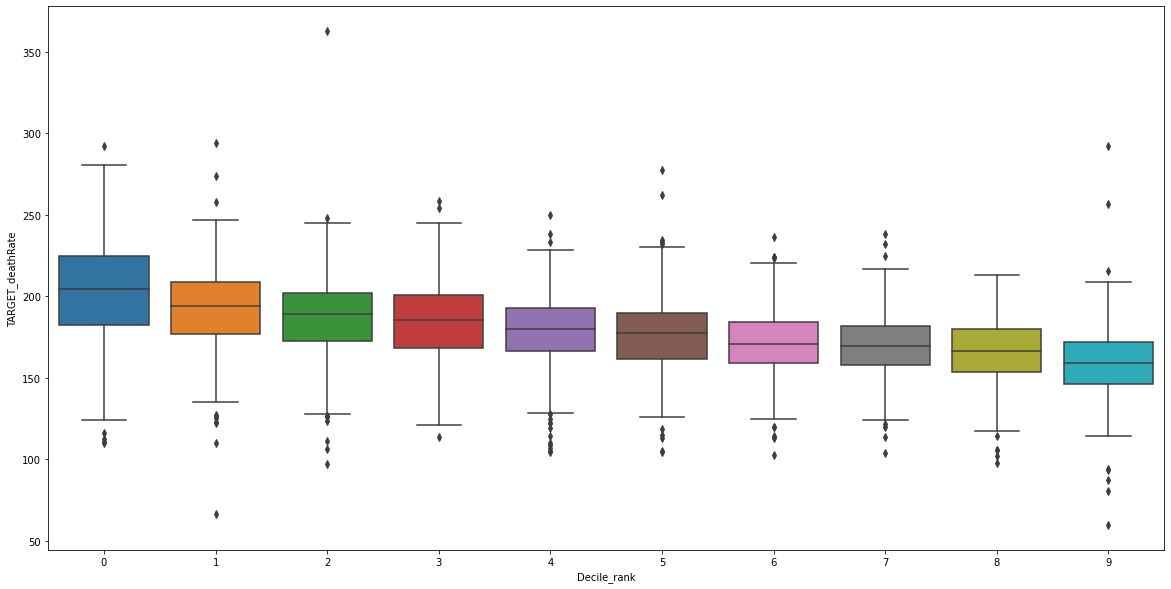

In [49]:
plt.figure(figsize=(20,10))
fig=sns.boxplot(x='Decile_rank', y="TARGET_deathRate", data=df)

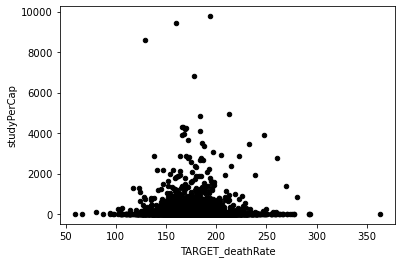

In [50]:
df.plot.scatter(x='TARGET_deathRate',y='studyPerCap', c="black")

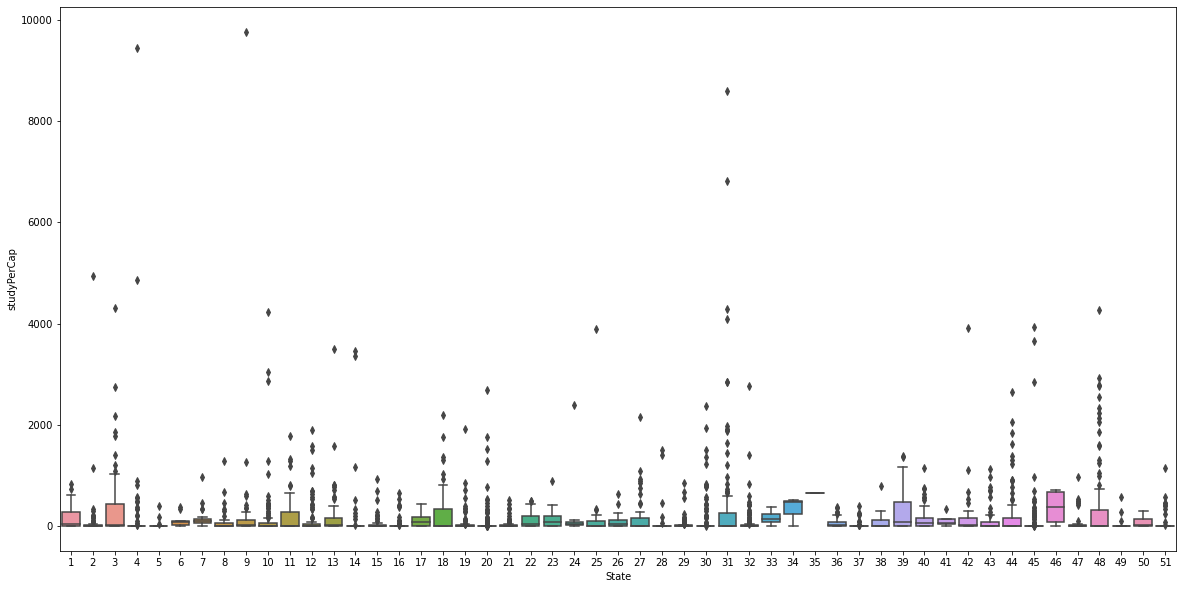

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(x='State', y="studyPerCap", data=df)

In [52]:
x=df.drop(['TARGET_deathRate'],axis=1)
y=df['TARGET_deathRate']
print(x.shape)
print(x.columns)
x.head()

(3017, 34)
Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'MinInc', 'MaxInc', 'Decile_rank',
       'State'],
      dtype='object')


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,MinInc,MaxInc,Decile_rank,State
0,1397.0,469,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,48.7,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,125635.0,125635.0,9,1
1,173.0,70,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,51046.4,51046.4,6,1
2,102.0,50,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,51046.4,51046.4,6,1
3,427.0,202,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,45201.0,45201.0,4,1
4,57.0,26,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,51046.4,51046.4,6,1


In [53]:
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")

shape: 
 (3017, 35)

 types:
 avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack                   float64
PctAsian                 

In [54]:
# podela skupa na trening i test podatke
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

 MSE je: 347.7668736239031 
 RMSE je: 18.64850861661337 
 MAE je : 14.40480856345429 
 r2 skor je: 0.4653554438406775 
 r2_prilagodjeni 0.4585726397699995
        y      y_pred
0   164.9  165.260038
1   161.3  152.234454
2   174.7  189.111965
3   194.8  207.170526
4   144.4  185.705499
5   176.0  197.301214
6   175.9  190.141624
7   183.6  167.956172
8   190.5  174.657277
9   177.8  195.480410
10  121.4  194.675434
11  172.7  164.568020
12  188.3  162.622049
13  165.3  161.797706
14  171.0  178.985617
15  174.2  186.227737
16  169.9  170.918671
17  153.8  163.751307
18  162.8  187.188986
19  163.3  170.605547
koeficijenti:  [-2.42186855e-03  1.66789649e-02  1.89453071e-01  1.30275256e-04
 -1.62545304e-05  8.74675923e-02 -9.60175723e-05  4.43274464e-01
 -7.49271453e-01 -2.65100634e-01  1.35030205e+00  1.22011396e+00
 -1.60464131e-01  2.35147666e-01 -7.87071600e-02  4.53846626e-01
 -1.09935559e+00 -5.13649685e-01  1.50732321e-01 -3.03025322e-01
  4.68092776e-02  3.47696885e-01 -4.2393424

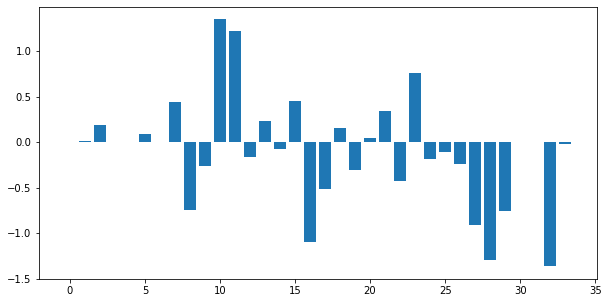

In [55]:
#linearna

from math import sqrt


from sklearn.model_selection import  KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)
    
indexes = kf.split(x_train, y_train)
for train_index, test_index in indexes:
    lin_regressor=LinearRegression(fit_intercept=True)
    lin_regressor.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
    y_pred=lin_regressor.predict(x_train.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)
    r2 = r2_score(y_train.iloc[test_index],y_pred)
    r2_prilagodjen = 1-(1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
    #r2 = r2_score(y_train.iloc[test_index],y_pred)
    #r2_prilagodjeni=r2_adj(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
print(' MSE je:',error,"\n",
      'RMSE je:',rmse,"\n",
      'MAE je :', mae,"\n",
      'r2 skor je:', r2,"\n", 
      'r2_prilagodjeni',r2_prilagodjen)
 # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_pred)], axis=1)
res.columns = ['y', 'y_pred']
print(res.head(20))

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lin_regressor.coef_)),lin_regressor.coef_)
print("koeficijenti: ", lin_regressor.coef_)
        

In [57]:
#Ponavljanje  uz standardizaciju obelezja

# Standardizacija obelezja (svodjenje na sr.vr. 0 i varijansu 1)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,MinInc,MaxInc,Decile_rank,State
0,-0.109909,0.017772,0.623376,-0.766421,-0.090681,0.318009,-0.134249,0.363965,0.163190,0.389743,-0.018924,0.380998,-0.126970,0.086842,-0.162095,-0.527077,-0.607472,-0.372232,-0.275686,-0.604079,0.023481,-0.757703,0.459463,0.374006,0.528606,-0.370201,-0.242080,-0.278412,0.121544,-0.477343,-0.547301,-0.547301,-0.877575,-0.897427
1,-0.304400,-0.237019,0.185613,0.637279,-0.217972,-1.086571,2.530871,0.267898,0.468987,0.069222,-0.457859,0.745556,-1.567477,0.231013,0.244078,-1.081156,1.124678,0.735907,-1.299050,0.903813,0.947075,0.701739,-0.886379,-1.074134,0.611385,-0.570054,-0.185143,-0.077778,0.311186,-0.679639,0.299125,0.299125,1.218875,0.155639
2,-0.407203,-0.326487,-4.079722,-0.438660,-0.283005,0.083913,-0.289376,0.556099,0.430762,0.634847,0.858946,-0.873080,0.981112,2.959183,-0.951877,1.348266,-0.830975,-1.628123,-0.392642,-0.869620,-1.215487,-0.608563,1.151610,1.015795,0.795401,-0.551071,-0.440682,-0.572259,0.409398,0.182475,-0.452704,-0.452704,-0.528166,-1.669676
3,-0.371083,-0.287588,-0.880245,-1.293446,-0.263757,1.488493,-0.289376,-0.270077,-0.658639,0.238910,0.235196,-0.843915,-1.038060,-0.667286,-1.380616,0.879430,-1.240731,-1.012490,0.952350,-1.324833,0.023481,-1.055983,0.779902,0.900602,-1.871827,2.495199,-0.374712,-0.404068,-0.901850,-0.601938,-0.793420,-0.793420,-1.576392,0.225844
4,-0.163394,-0.032797,0.101867,-0.718882,-0.103772,0.754990,-0.151791,-0.077943,-0.257280,0.125785,0.420011,-0.989738,0.747183,0.874240,-1.042138,0.183280,-0.793725,-1.000178,2.034192,-1.002390,-1.024010,-0.853578,0.895259,1.032252,-0.398969,0.612007,-0.171016,-0.292319,-0.854867,-0.379654,-0.547301,-0.547301,-0.877575,0.717275


 MSE je: 347.7668736239299 
 RMSE je: 18.648508616614087 
 MAE je : 14.404808563455562 
 r2 skor je: 0.4653554438406363 
 r2_prilagodjeni 0.4585726397699579
        y      y_pred
0   164.9  165.260038
1   161.3  152.234454
2   174.7  189.111965
3   194.8  207.170526
4   144.4  185.705499
5   176.0  197.301214
6   175.9  190.141624
7   183.6  167.956172
8   190.5  174.657277
9   177.8  195.480410
10  121.4  194.675434
11  172.7  164.568020
12  188.3  162.622049
13  165.3  161.797706
14  171.0  178.985617
15  174.2  186.227737
16  169.9  170.918671
17  153.8  163.751307
18  162.8  187.188986
19  163.3  170.605547
koeficijenti:  [-3.48663973  8.5754441   9.95383176  1.55927492 -5.45697148  0.56045811
 -0.0510534   2.30711097 -3.92036165 -1.40605805  0.58449977  8.36708982
 -1.30331283  2.12033508 -0.34879894  3.1944964  -5.90249514 -4.17172068
  0.51551853 -3.19525611  0.41558938  3.26388408 -3.30745285  4.60229002
 -3.09102503 -1.63848167 -0.63880335 -3.10708178 -8.48484692 -1.48613977
 

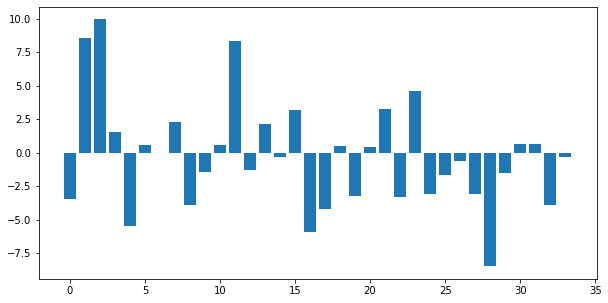

In [58]:
#linearna std

from sklearn.model_selection import  KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)
    
indexes = kf.split(x_train_std, y_train)
for train_index, test_index in indexes:
    lin_regressor=LinearRegression(fit_intercept=True)
    lin_regressor.fit(x_train_std.iloc[train_index,:], y_train.iloc[train_index])
    y_pred=lin_regressor.predict(x_train_std.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)
    r2 = r2_score(y_train.iloc[test_index],y_pred)
    r2_prilagodjen = 1-(1-r2)*(x_train_std.shape[0]-1)/(x_train_std.shape[0]-x_train_std.shape[1]-1)
    #r2 = r2_score(y_train.iloc[test_index],y_pred)
    #r2_prilagodjeni=r2_adj(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
print(' MSE je:',error,"\n",
      'RMSE je:',rmse,"\n",
      'MAE je :', mae,"\n",
      'r2 skor je:', r2,"\n", 
      'r2_prilagodjeni',r2_prilagodjen)
 # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_pred)], axis=1)
res.columns = ['y', 'y_pred']
print(res.head(20))

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lin_regressor.coef_)),lin_regressor.coef_)
print("koeficijenti: ", lin_regressor.coef_)

 MSE je: 347.72591183357423 
 RMSE je: 18.647410325124888 
 MAE je : 14.403522120834023 
 r2 skor je: 0.46541841705598597 
 r2_prilagodjeni 0.45863641189923354
koeficijenti:  [-2.42225574e-03  1.66821585e-02  1.89464120e-01  1.29850738e-04
 -1.62581387e-05  8.78804581e-02 -9.56701890e-05  4.27624499e-01
 -7.40041486e-01 -2.58881166e-01  1.32986795e+00  1.21890819e+00
 -1.60600638e-01  2.35186215e-01 -7.87170348e-02  4.53976237e-01
 -1.09885548e+00 -5.12917104e-01  1.51174774e-01 -3.03932573e-01
  4.69219522e-02  3.47835225e-01 -4.22669786e-01  7.55787583e-01
 -1.89644818e-01 -1.13102847e-01 -2.40390667e-01 -9.09895516e-01
 -1.29389865e+00 -7.51094119e-01  2.73359681e-05  2.73160684e-05
 -1.36370776e+00 -2.06718908e-02]


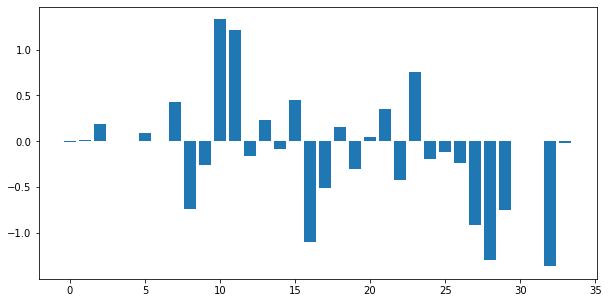

In [59]:
#ridge

from sklearn.model_selection import  KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)
    
indexes = kf.split(x_train, y_train)
for train_index, test_index in indexes:
    ridge_model = Ridge(alpha=5)
    ridge_model.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
    y_pred=ridge_model.predict(x_train.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)
    r2 = r2_score(y_train.iloc[test_index],y_pred)
    r2_prilagodjen = 1-(1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
    #r2 = r2_score(y_train.iloc[test_index],y_pred)
    #r2_prilagodjeni=r2_adj(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
print(' MSE je:',error,"\n",
      'RMSE je:',rmse,"\n",
      'MAE je :', mae,"\n",
      'r2 skor je:', r2,"\n", 
      'r2_prilagodjeni',r2_prilagodjen)

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

 MSE je: 347.74159270562535 
 RMSE je: 18.647830777482547 
 MAE je : 14.390587174195298 
 r2 skor je: 0.46539430983498875 
 r2_prilagodjeni 0.45861199884035797
koeficijenti:  [-3.32000979  7.83530488  9.95815685  1.39874704 -4.87966669  0.53672941
 -0.05595692  1.05094779 -3.15332311 -0.89905858  0.56911276  8.03422246
 -1.3028772   2.14408285 -0.33568652  3.19766134 -5.82990138 -3.96700315
  0.56479642 -3.29285901  0.41140733  3.2827769  -2.95479866  4.33732509
 -3.0179525  -1.55449923 -0.62230393 -3.10154947 -8.19356512 -1.47407651
  0.70210025  0.70210025 -3.85530519 -0.28045088]


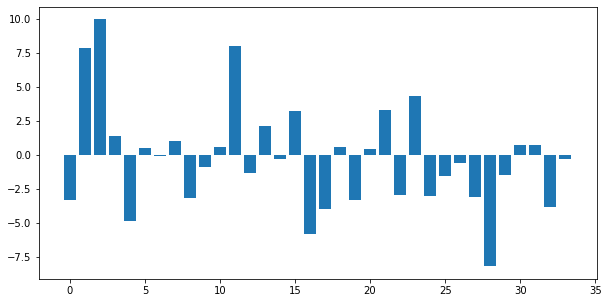

In [60]:
#Ridge std

from sklearn.model_selection import  KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)
    
indexes = kf.split(x_train_std, y_train)
for train_index, test_index in indexes:
    ridge_model = Ridge(alpha=5)
    ridge_model.fit(x_train_std.iloc[train_index,:], y_train.iloc[train_index])
    y_pred=ridge_model.predict(x_train_std.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)
    r2 = r2_score(y_train.iloc[test_index],y_pred)
    r2_prilagodjen = 1-(1-r2)*(x_train_std.shape[0]-1)/(x_train_std.shape[0]-x_train_std.shape[1]-1)
    #r2 = r2_score(y_train.iloc[test_index],y_pred)
    #r2_prilagodjeni=r2_adj(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
print(' MSE je:',error,"\n",
      'RMSE je:',rmse,"\n",
      'MAE je :', mae,"\n",
      'r2 skor je:', r2,"\n", 
      'r2_prilagodjeni',r2_prilagodjen)

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

 MSE je: 365.723474867097 
 RMSE je: 19.123898003992206 
 MAE je : 14.51815636856877 
 r2 skor je: 0.43774959684968484 
 r2_prilagodjeni 0.4306165693470315
koeficijenti:  [-3.07148536e-03  1.73121353e-02  2.12978961e-01 -5.19638821e-04
 -1.55468240e-05  4.11444178e-02 -3.73194414e-04 -0.00000000e+00
 -7.28751271e-02 -8.90428878e-03  0.00000000e+00 -0.00000000e+00
 -6.40388321e-02  2.29612233e-01 -0.00000000e+00  4.71147788e-01
 -5.62376930e-01 -6.31411797e-02  0.00000000e+00 -3.96403597e-01
  0.00000000e+00  1.73018483e-01  0.00000000e+00  1.69161301e-01
 -1.26048289e-01  0.00000000e+00  0.00000000e+00 -2.78467437e-01
 -6.76202485e-02 -0.00000000e+00  1.10446065e-04  1.55094602e-20
 -0.00000000e+00 -0.00000000e+00]


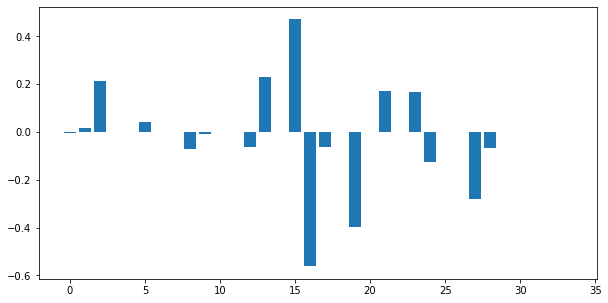

In [61]:
#LASSO

from sklearn.model_selection import  KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)
    
indexes = kf.split(x_train, y_train)
for train_index, test_index in indexes:
    lasso_model = Lasso(alpha=5)
    lasso_model.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
    y_pred=lasso_model.predict(x_train.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)
    r2 = r2_score(y_train.iloc[test_index],y_pred)
    r2_prilagodjen = 1-(1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
    #r2 = r2_score(y_train.iloc[test_index],y_pred)
    #r2_prilagodjeni=r2_adj(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
print(' MSE je:',error,"\n",
      'RMSE je:',rmse,"\n",
      'MAE je :', mae,"\n",
      'r2 skor je:', r2,"\n", 
      'r2_prilagodjeni',r2_prilagodjen)

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

 MSE je: 412.5036324041722 
 RMSE je: 20.31018543500212 
 MAE je : 15.52040232998479 
 r2 skor je: 0.36583142850073236 
 r2_prilagodjeni 0.35778600632499535
koeficijenti:  [-0.         -0.          6.81612129 -0.         -0.          1.15131282
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.56783114 -4.75744411 -0.
  0.         -0.         -0.         -0.          0.          2.69221228
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.99665678  0.        ]


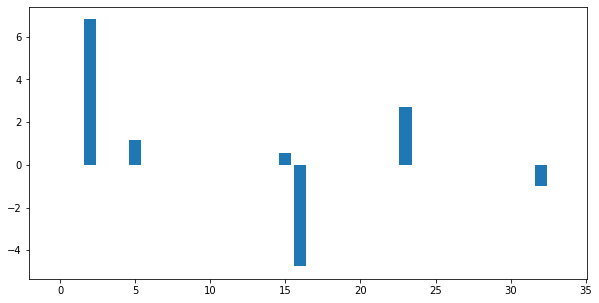

In [62]:
#lassp std

from sklearn.model_selection import  KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)
    
indexes = kf.split(x_train_std, y_train)
for train_index, test_index in indexes:
    lasso_model = Lasso(alpha=5)
    lasso_model.fit(x_train_std.iloc[train_index,:], y_train.iloc[train_index])
    y_pred=lasso_model.predict(x_train_std.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)
    r2 = r2_score(y_train.iloc[test_index],y_pred)
    r2_prilagodjen = 1-(1-r2)*(x_train_std.shape[0]-1)/(x_train_std.shape[0]-x_train_std.shape[1]-1)
    #r2 = r2_score(y_train.iloc[test_index],y_pred)
    #r2_prilagodjeni=r2_adj(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
print(' MSE je:',error,"\n",
      'RMSE je:',rmse,"\n",
      'MAE je :', mae,"\n",
      'r2 skor je:', r2,"\n", 
      'r2_prilagodjeni',r2_prilagodjen)

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

In [62]:
# NE BRISII!!
# #SVR regresor
# from sklearn.svm import SVR

# # First, let's choose which kernel is the best for our data

# for k in ['linear','poly','rbf','sigmoid']:
#     clf = SVR(kernel=k)
#     clf.fit(x_train, y_train)
#     confidence = clf.score(x_train, y_train)
#     print(k,confidence)

# NAJBOLJI REZULTAT JE DAO rbf, JAKO DUGO IZVRŠAVA PA NE POKREĆEMO PONOVO

In [63]:
#kNN

from sklearn.model_selection import  KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

indexes = kf.split(x_train, y_train)

rmse_val=[]
for k in [1,2,3,4,5,10,15, 23,30]:
    indexes = kf.split(x_train, y_train)
    for train_index, test_index in indexes:
        regressor=KNeighborsRegressor(n_neighbors=k)
        regressor.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
        y_pred=regressor.predict(x_train.iloc[test_index,:])
        error = mean_squared_error(y_train.iloc[test_index],y_pred)
        rmse=sqrt(error)
        mae = mean_absolute_error(y_train.iloc[test_index],y_pred)

        r2 = r2_score(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
    print('za param k=',k,'rmse je:',rmse,'MAE je :', mae, 'r2 skor je:', r2)
        
    

        

za param k= 1 rmse je: 31.680850257888135 MAE je : 23.060147601476015 r2 skor je: -0.54301659024485
za param k= 2 rmse je: 26.81547251906377 MAE je : 20.487638376383764 r2 skor je: -0.10547225266319438
za param k= 3 rmse je: 24.884478235891763 MAE je : 19.287945879458796 r2 skor je: 0.04800642736627425
za param k= 4 rmse je: 23.670768791971078 MAE je : 18.404797047970483 r2 skor je: 0.1386063521637546
za param k= 5 rmse je: 23.46732306123808 MAE je : 18.229151291512917 r2 skor je: 0.15334974770302867
za param k= 10 rmse je: 23.045227984147356 MAE je : 17.797564575645755 r2 skor je: 0.18353239888514572
za param k= 15 rmse je: 22.43650074779171 MAE je : 17.156162361623622 r2 skor je: 0.22609583054090365
za param k= 23 rmse je: 22.247063044748334 MAE je : 17.06632440237446 r2 skor je: 0.23910924197488637
za param k= 30 rmse je: 22.1817135799553 MAE je : 16.95669126691267 r2 skor je: 0.24357282202587016


In [64]:


from sklearn.model_selection import  KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

indexes = kf.split(x_train, y_train)
    
indexes = kf.split(x_train, y_train)
for train_index, test_index in indexes:
    regressor=KNeighborsRegressor(n_neighbors=30)
    regressor.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
    y_pred=regressor.predict(x_train.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)

    r2 = r2_score(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
print('za param k=',k,'rmse je:',rmse,'MSE:',error,'MAE je :', mae, 'r2 skor je:', r2)
        

za param k= 30 rmse je: 22.1817135799553 MSE: 492.02841734317343 MAE je : 16.95669126691267 r2 skor je: 0.24357282202587016


In [65]:

regressor = KNeighborsRegressor(n_neighbors=30)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
error = mean_squared_error(y_test,y_pred)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('rmse je:',rmse,'\n',
      'mse je:', error,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

rmse je: 26.675782115463278 
 mse je: 711.5973514716704 
 MAE je : 19.746368653421634 
 r2 skor je: 0.215107380150385 
 MSE je: 711.5973514716704


In [66]:
#kNN sa stdandardizacijom

from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

indexes = kf.split(x_train, y_train)

rmse_val=[]
for k in [1,2,3,4,5,10,15, 23,30 ]:
    
    indexes = kf.split(x_train_std, y_train)
    for train_index, test_index in indexes:
        regressor=KNeighborsRegressor(n_neighbors=k)
        regressor.fit(x_train_std.iloc[train_index,:], y_train.iloc[train_index])
        y_pred=regressor.predict(x_train_std.iloc[test_index,:])
        error = mean_squared_error(y_train.iloc[test_index],y_pred)
        rmse=sqrt(error)
        mae = mean_absolute_error(y_train.iloc[test_index],y_pred)

        r2 = r2_score(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
    print('za param k=',k,'rmse je:',rmse,'MAE je :', mae, 'r2 skor je:', r2)

za param k= 1 rmse je: 25.590392569906367 MAE je : 19.428044280442805 r2 skor je: -0.00677131821994692
za param k= 2 rmse je: 21.811119959198308 MAE je : 16.31531365313653 r2 skor je: 0.26863719316397494
za param k= 3 rmse je: 20.81542068797516 MAE je : 15.880688806888067 r2 skor je: 0.33388789934424645
za param k= 4 rmse je: 20.178970857117527 MAE je : 15.64363468634686 r2 skor je: 0.3739990904177427
za param k= 5 rmse je: 19.834253013913234 MAE je : 15.089963099630996 r2 skor je: 0.39520438186447804
za param k= 10 rmse je: 19.195591168161585 MAE je : 14.495129151291513 r2 skor je: 0.43352607838380897
za param k= 15 rmse je: 19.24270597741735 MAE je : 14.476629766297668 r2 skor je: 0.4307418906551723
za param k= 23 rmse je: 19.193092434193098 MAE je : 14.56712658430932 r2 skor je: 0.43367354719479545
za param k= 30 rmse je: 19.17362383707134 MAE je : 14.545670356703564 r2 skor je: 0.4348218759139374


In [67]:
#kNN sa stdandardizacijom
 
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

indexes = kf.split(x_train, y_train)   
for train_index, test_index in indexes:
    regressor=KNeighborsRegressor(n_neighbors=10)
    regressor.fit(x_train_std.iloc[train_index,:], y_train.iloc[train_index])
    y_pred=regressor.predict(x_train_std.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)

    r2 = r2_score(y_train.iloc[test_index],y_pred)
        #rmse_val.append(error)
        #print('rmse',rmse)
print('za param k=',10,'rmse je:',rmse,'MSE je:', error,'MAE je :', mae, 'r2 skor je:', r2)

za param k= 10 rmse je: 19.195591168161585 MSE je: 368.470720295203 MAE je : 14.495129151291513 r2 skor je: 0.43352607838380897


In [68]:
regressor = KNeighborsRegressor(n_neighbors=10)
regressor.fit(x_train_std,y_train)
y_pred = regressor.predict(x_test_std)
error = mean_squared_error(y_test,y_pred)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

rmse je: 21.567404021466412 
 MAE je : 15.48175496688742 
 r2 skor je: 0.4869358489156862 
 MSE je: 465.15291622516554


In [69]:
#SVR 

from sklearn.svm import SVR

kf = KFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(x_train, y_train)
for c in [1, 10, 100]:
            indexes = kf.split(x_train, y_train)
            
            for train_index, test_index in indexes:
                regressor = SVR(C=c, degree=3, kernel='rbf')
                regressor.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
                y_pred = regressor.predict(x_train.iloc[test_index,:])
                error = mean_squared_error(y_train.iloc[test_index],y_pred)
                rmse=sqrt(error)
                mae = mean_absolute_error(y_train.iloc[test_index],y_pred)

                r2 = r2_score(y_train.iloc[test_index],y_pred)
            print('za parametre C=', c, ', kernel=','rbf' ,  ' RMSE je: ', rmse,'MAE je :', mae, 'r2 skor je:', r2)
            

za parametre C= 1 , kernel= rbf  RMSE je:  23.477058877832985 MAE je : 18.24194615869409 r2 skor je: 0.15264710757709266
za parametre C= 10 , kernel= rbf  RMSE je:  22.433828931373593 MAE je : 17.449631104442293 r2 skor je: 0.2262801379579138
za parametre C= 100 , kernel= rbf  RMSE je:  21.883529788893078 MAE je : 16.707455587033625 r2 skor je: 0.2637730905705088


In [70]:
#SVR 

from sklearn.svm import SVR

kf = KFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(x_train, y_train)
for train_index, test_index in indexes:
    regressor = SVR(C=100, degree=3, kernel='rbf')
    regressor.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
    y_pred = regressor.predict(x_train.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)

    r2 = r2_score(y_train.iloc[test_index],y_pred)
print('za parametre C=', 100, ', kernel=','rbf' ,'MSE je ', error,  ' RMSE je: ', rmse,'MAE je :', mae, 'r2 skor je:', r2)
            

za parametre C= 100 , kernel= rbf MSE je  478.8888760213708  RMSE je:  21.883529788893078 MAE je : 16.707455587033625 r2 skor je: 0.2637730905705088


In [71]:

regressor = SVR(C=100, degree=3, kernel='rbf')
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
error = mean_squared_error(y_test,y_pred)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('rmse je:',rmse,'\n',
      'mse je:', error,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

rmse je: 27.143274024403517 
 mse je: 736.7573247638587 
 MAE je : 20.265190347224685 
 r2 skor je: 0.18735590340330177 
 MSE je: 736.7573247638587


In [72]:
#SVR sa standardizacijom

from sklearn.svm import SVR

kf = KFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(x_train_std, y_train)
for c in [1, 10, 100]:
            indexes = kf.split(x_train_std, y_train)
            
            for train_index, test_index in indexes:
                regressor = SVR(C=c, degree=3, kernel='rbf')
                regressor.fit(x_train_std.iloc[train_index,:], y_train.iloc[train_index])
                y_pred = regressor.predict(x_train_std.iloc[test_index,:])
                error = mean_squared_error(y_train.iloc[test_index],y_pred)
                rmse=sqrt(error)
                mae = mean_absolute_error(y_train.iloc[test_index],y_pred)

                r2 = r2_score(y_train.iloc[test_index],y_pred)
            print('za parametre C=', c, ', kernel=','rbf' ,  ' RMSE je: ', rmse,'MAE je :', mae, 'r2 skor je:', r2)
            

za parametre C= 1 , kernel= rbf  RMSE je:  19.731668108498823 MAE je : 14.860026394727777 r2 skor je: 0.40144434007561114
za parametre C= 10 , kernel= rbf  RMSE je:  18.64064277782512 MAE je : 13.921548589121347 r2 skor je: 0.46580636901233374
za parametre C= 100 , kernel= rbf  RMSE je:  18.348832845540663 MAE je : 13.655751304579393 r2 skor je: 0.48240052554460355


In [73]:
#SVR sa standardizacijom

from sklearn.svm import SVR

kf = KFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(x_train_std, y_train)
for train_index, test_index in indexes:
    regressor = SVR(C=100, degree=3, kernel='rbf')
    regressor.fit(x_train_std.iloc[train_index,:], y_train.iloc[train_index])
    y_pred = regressor.predict(x_train_std.iloc[test_index,:])
    error = mean_squared_error(y_train.iloc[test_index],y_pred)
    rmse=sqrt(error)
    mae = mean_absolute_error(y_train.iloc[test_index],y_pred)

    r2 = r2_score(y_train.iloc[test_index],y_pred)
print('za parametre C=', 100, ', kernel=','rbf' , 'MSE je', error,  ' RMSE je: ', rmse,'MAE je :', mae, 'r2 skor je:', r2)


za parametre C= 100 , kernel= rbf MSE je 336.6796667935918  RMSE je:  18.348832845540663 MAE je : 13.655751304579393 r2 skor je: 0.48240052554460355


In [74]:
regressor = SVR(C=100, degree=3, kernel='rbf')
regressor.fit(x_train_std,y_train)
y_pred = regressor.predict(x_test_std)
error = mean_squared_error(y_test,y_pred)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

rmse je: 21.8634363562499 
 MAE je : 14.530911418261375 
 r2 skor je: 0.47275463833860554 
 MSE je: 478.0098493037899


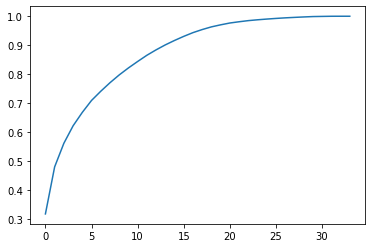

In [75]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=None)
pca.fit(x_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [76]:
# SA PCA kNN
pca = PCA(n_components=15)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  15
rmse je: 21.19131482877326 
 MAE je : 15.263543046357617 
 r2 skor je: 0.5046733101996591 
 MSE je: 449.07182417218536
vreme trajanja je:  0.01900482177734375  sekundi.


In [77]:
# SA PCA kNN
pca = PCA(n_components=13)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  13
rmse je: 21.2106425398582 
 MAE je : 15.201986754966887 
 r2 skor je: 0.5037693646881138 
 MSE je: 449.8913569536423
vreme trajanja je:  0.018002986907958984  sekundi.


In [78]:
# SA PCA kNN
pca = PCA(n_components=14)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  14
rmse je: 21.049491696054126 
 MAE je : 15.22476821192053 
 r2 skor je: 0.5112810844708563 
 MSE je: 443.08110066225163
vreme trajanja je:  0.018507719039916992  sekundi.


In [79]:
# SA PCA kNN
pca = PCA(n_components=16)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  16
rmse je: 21.292366002865908 
 MAE je : 15.25360927152318 
 r2 skor je: 0.4999380982401054 
 MSE je: 453.36484999999993
vreme trajanja je:  0.021004915237426758  sekundi.


In [80]:
# SA PCA kNN
pca = PCA(n_components=17)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  17
rmse je: 21.171523288237218 
 MAE je : 15.25062913907285 
 r2 skor je: 0.5055980947610152 
 MSE je: 448.2333983443708
vreme trajanja je:  0.022006750106811523  sekundi.


In [81]:
# SA PCA SVM
pca = PCA(n_components=15)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = SVR(C=100, degree=3, kernel='rbf')
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  15
rmse je: 22.437552939598728 
 MAE je : 14.957709726169629 
 r2 skor je: 0.44470098417476234 
 MSE je: 503.4437819172955
vreme trajanja je:  0.4614555835723877  sekundi.


In [82]:
# SA PCA SVM
pca = PCA(n_components=13)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = SVR(C=100, degree=3, kernel='rbf')
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  13
rmse je: 22.66239152361228 
 MAE je : 15.138383697865557 
 r2 skor je: 0.4335163245726815 
 MSE je: 513.5839895694937
vreme trajanja je:  0.41346311569213867  sekundi.


In [83]:
# SA PCA SVM
pca = PCA(n_components=14)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = SVR(C=100, degree=3, kernel='rbf')
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  14
rmse je: 22.631631685308168 
 MAE je : 15.09151661471121 
 r2 skor je: 0.43505306624737516 
 MSE je: 512.1907527394446
vreme trajanja je:  0.50913405418396  sekundi.


In [84]:
# SA PCA SVM
pca = PCA(n_components=16)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = SVR(C=100, degree=3, kernel='rbf')
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  16
rmse je: 22.446346818642233 
 MAE je : 14.964725906944844 
 r2 skor je: 0.4442656257088734 
 MSE je: 503.8384855027703
vreme trajanja je:  0.48468971252441406  sekundi.


In [85]:
# SA PCA SVM
pca = PCA(n_components=17)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = SVR(C=100, degree=3, kernel='rbf')
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  17
rmse je: 22.189600077183883 
 MAE je : 14.87018563750399 
 r2 skor je: 0.45690616535627604 
 MSE je: 492.378351585359
vreme trajanja je:  0.5020575523376465  sekundi.


In [86]:
# SA PCA Linearna
pca = PCA(n_components=15)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = LinearRegression(fit_intercept=True)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')


Redukovani prostor ima dimenziju:  15
rmse je: 19.917347472521637 
 MAE je : 15.066758008594432 
 r2 skor je: 0.5624386812432819 
 MSE je: 396.7007303411641
vreme trajanja je:  0.0029990673065185547  sekundi.


In [87]:
# SA PCA Linearna
pca = PCA(n_components=13)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = LinearRegression(fit_intercept=True)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  13
rmse je: 19.903426783629516 
 MAE je : 15.048806260767996 
 r2 skor je: 0.5630501106893356 
 MSE je: 396.14639773130085
vreme trajanja je:  0.0020008087158203125  sekundi.


In [88]:
# SA PCA Linearna
pca = PCA(n_components=14)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = LinearRegression(fit_intercept=True)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  14
rmse je: 19.89931971997319 
 MAE je : 15.050120849782697 
 r2 skor je: 0.5632304209317895 
 MSE je: 395.9829253177138
vreme trajanja je:  0.0029985904693603516  sekundi.


In [89]:
# SA PCA Linearna
pca = PCA(n_components=16)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = LinearRegression(fit_intercept=True)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  16
rmse je: 19.77573894157201 
 MAE je : 14.940732017562464 
 r2 skor je: 0.568638517358325 
 MSE je: 391.07985068520753
vreme trajanja je:  0.003001689910888672  sekundi.


In [90]:
# SA PCA Linearna
pca = PCA(n_components=17)
pca.fit(x_train_std)
X_train_r = pca.transform(x_train_std)
X_test_r = pca.transform(x_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = LinearRegression(fit_intercept=True)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)

error = mean_squared_error(y_test,y_pred2)
rmse=sqrt(error)
mae = mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('rmse je:',rmse,'\n',
      'MAE je :', mae,'\n',
      'r2 skor je:',r2,'\n',
      'MSE je:' , error)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  17
rmse je: 19.64064349572996 
 MAE je : 14.814716366233196 
 r2 skor je: 0.5745119689606515 
 MSE je: 385.75487692635966
vreme trajanja je:  0.002000093460083008  sekundi.
